# Explicación Teórica - Regresión Lineal

La regresión lineal es un algoritmo fundamental en estadísticas y aprendizaje automático que se utiliza para modelar la relación entre una variable independiente (predictora) y una variable dependiente (objetivo) a través de una ecuación lineal.

**Explicación del Algoritmo de Regresión Lineal:**

1. **Modelo Lineal:** En la regresión lineal, asumimos que existe una relación lineal entre la variable independiente (X) y la variable dependiente (Y). Esta relación se expresa a través de una ecuación lineal de la forma:
   ```
   Y = b0 + b1 * X
   ```
   Donde:
   - Y: Variable dependiente (objetivo).
   - X: Variable independiente (predictora).
   - b0: Intersección en el eje Y (también llamada "ordenada al origen").
   - b1: Pendiente de la línea.

2. **Objetivo de la Regresión:** El objetivo de la regresión lineal es encontrar los valores de los coeficientes b0 y b1 que mejor ajusten la línea a los datos observados. Esto implica minimizar la diferencia entre las predicciones del modelo y los valores reales de Y.

3. **Método de Mínimos Cuadrados:** El método más común utilizado para encontrar los valores óptimos de b0 y b1 es el método de mínimos cuadrados. Este método busca minimizar la suma de los cuadrados de las diferencias entre las predicciones del modelo y los valores reales. En otras palabras, se busca la línea que minimice la suma de los errores al cuadrado.

   ![Mínimos Cuadrados](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/400px-Linear_regression.svg.png)

4. **Visualización de la Regresión Lineal:** Para visualizar la regresión lineal, puedes utilizar un gráfico de dispersión que muestre los puntos de datos observados y la línea de regresión ajustada. La línea de regresión se calcula para minimizar la distancia vertical entre los puntos de datos y la línea.

   ![Gráfico de Regresión Lineal](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Residuals_for_Linear_Regression_Fit.png/400px-Residuals_for_Linear_Regression_Fit.png)

5. **Evaluación del Modelo:** Para evaluar la calidad del modelo de regresión, se suelen utilizar métricas como el error cuadrático medio (MSE), el coeficiente de determinación (R^2) y otros indicadores de ajuste del modelo.

   - **MSE (Error Cuadrático Medio)**: Mide la magnitud de los errores en las predicciones del modelo. Se busca minimizar este valor.
   - **R^2 (Coeficiente de Determinación)**: Proporciona información sobre cuánta variabilidad en los datos es explicada por el modelo. Un valor cercano a 1 indica un buen ajuste.

   ![Evaluación del Modelo](https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/Coefficient_of_Determination.svg/400px-Coefficient_of_Determination.svg.png)

6. **Predicciones con el Modelo:** Una vez que se ha ajustado el modelo de regresión lineal, se pueden hacer predicciones para nuevos valores de X. Simplemente se inserta el valor de X en la ecuación lineal y se obtiene el valor predicho de Y.

   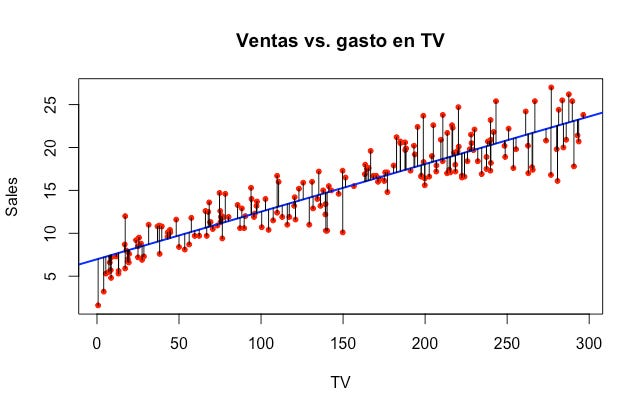

En resumen, la regresión lineal es una técnica que busca ajustar una línea recta a los datos para modelar la relación entre una variable predictora y una variable objetivo. El proceso implica encontrar los coeficientes óptimos, evaluar el modelo y hacer predicciones. Las imágenes proporcionadas pueden ayudar a visualizar este proceso.

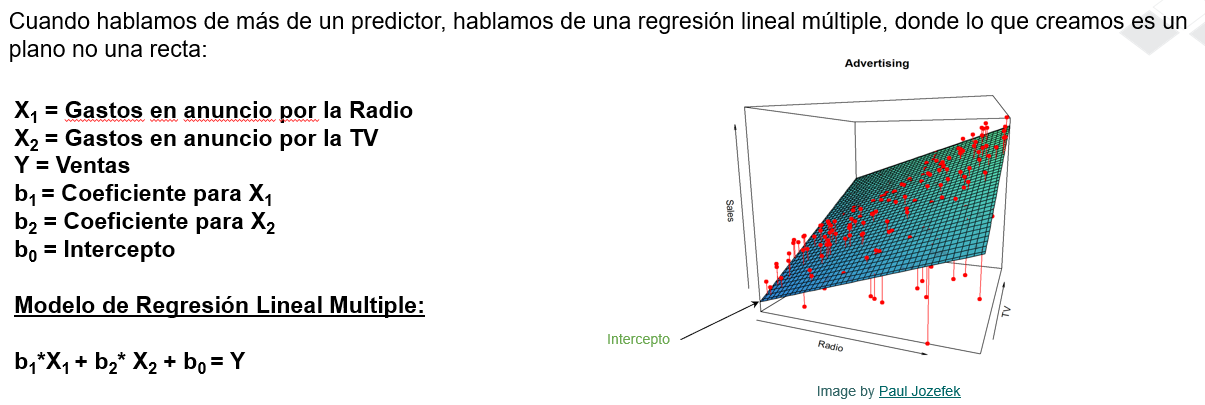

In [1]:
from IPython.display import Image

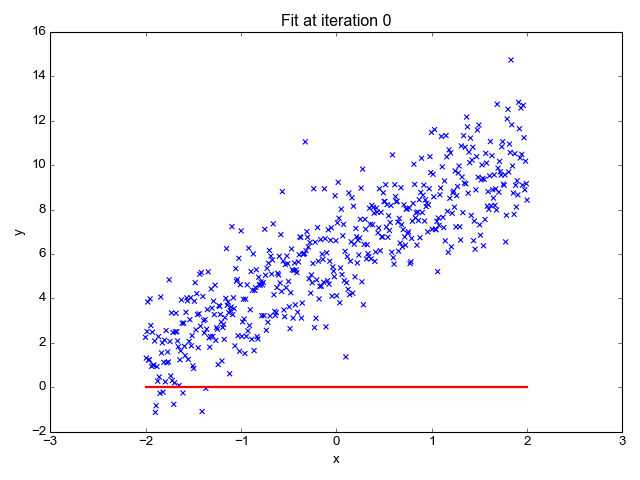

In [2]:
Image(filename=r"C:\Users\gilbe\OneDrive\Desktop\Gilberto\0. TEP\000. Analitica Avanzada de Datos ML\0. Grupo 6\Imagenes\Linear Regression.gif")

# Proyecto Regresión Lineal con Python

Su vecino es un agente de bienes raíces y quiere ayuda para predecir los precios de la vivienda para las regiones de EE. UU. Sería genial si de alguna manera pudiera crear un modelo para que le permitiera poner algunas características de una casa y devolver una estimación de lo que la casa se vendería.

El le ha preguntado si podría ayudarlo con sus nuevas habilidades en ciencia de datos.

Su vecino le brinda información sobre un grupo de casas en regiones de los Estados Unidos, todo está en el conjunto de datos: USA_Housing.csv.

Los datos contienen las siguientes columnas:

* 'Avg. Area Income': Promedio Los ingresos de los residentes de la casa en esa ciudad.
* 'Avg. Area House Age': Edad promedio de las casas en esa ciudad
* 'Avg. Area Number of Rooms': Promedio de salas para casas de esa ciudad
* 'Avg. Area Number of Bedrooms': Promedio de habitaciones para casas de esa ciudad
* 'Area Population': La población de la  ciudad donde se encuentra la casa
* 'Price': Precio al que se vendió la casa
* 'Address': Dirección de la casa

**¡Empecemos!**
## Consulta los datos
Hemos podido obtener algunos datos de su vecino para los precios de la vivienda como un conjunto csv, ¡preparemos nuestro entorno con las bibliotecas que necesitaremos y luego importemos los datos!
### Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Revisa los datos

In [2]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [3]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# Análisis exploratorio de datos

¡Creemos algunos gráficos simples para verificar los datos!

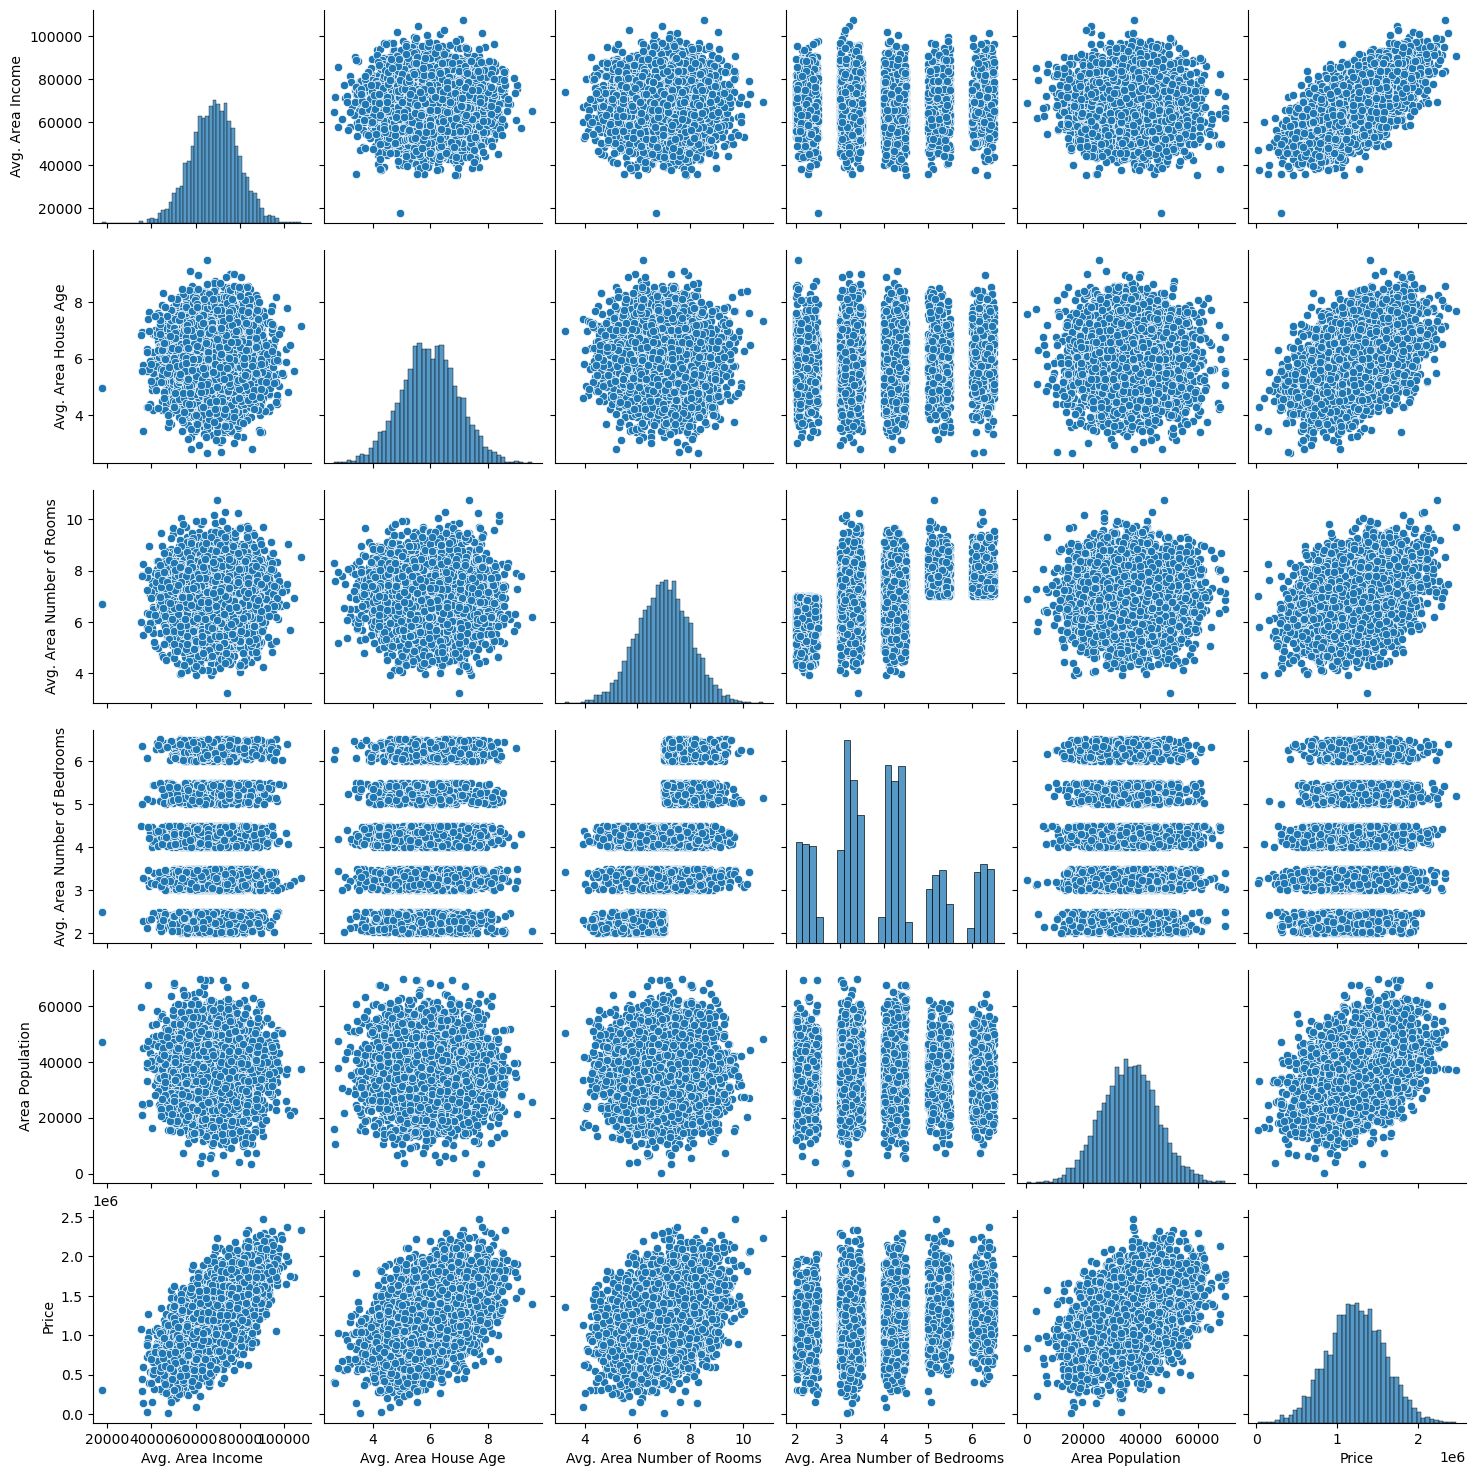

In [7]:
sns.pairplot(USAhousing)

<AxesSubplot:>

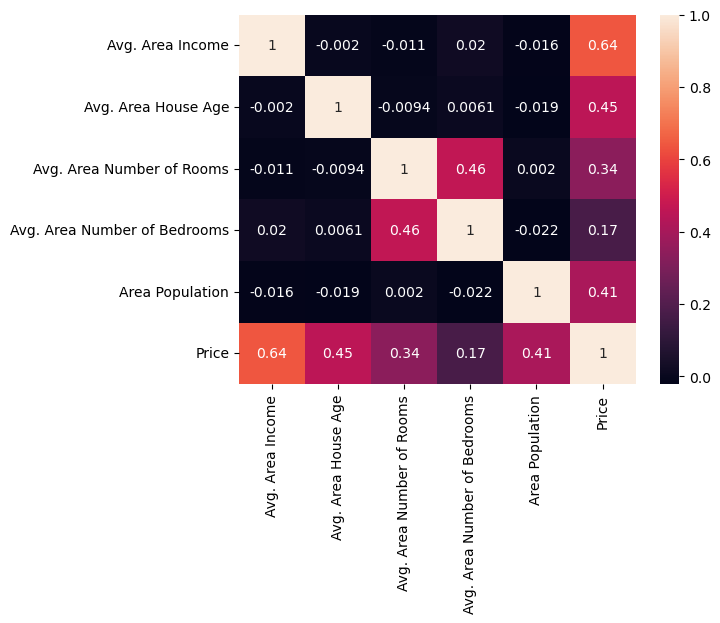

In [8]:
sns.heatmap(USAhousing.corr(), annot= True)

# Regresión Lineal

Los modelos de Regresión Lineal busca crear una linea lo más cercana a todos los puntos posibles en un plano N-dimensional.

Un Modelo de Regresión Lineal viene dado por la siguiente ecuación:
    
    y = a + bx -> Modelo de Regresión Lineal Simple
    y = a + b1x1 + b2x2 + b3x3 +...+bnxn -> Modelo de Regresión Lineal Multiple

Donde:

**y**: Es el valor a predecir, variable dependiente.

**x**: Es el valor de las variables independientes o predictoras.

**a**: Es el valor de la intersección, que es el valor que toma y cuando todas las variables predictoras son igual a 0.

**b**: Es la pendiente o coeficientes, indica la tasa de cambio de y cuando x aumenta 1.    

## Entrenamiento de un modelo de regresión lineal

¡Comencemos ahora a entrenar el modelo de regresión! Primero necesitaremos dividir nuestros datos en una matriz X que contenga las características para entrenar, y una matriz y con la variable objetivo, en este caso la columna Precio. Desecharemos la columna Dirección porque solo tiene información de texto que el modelo de regresión lineal no puede usar.

### Matrices X e Y

In [9]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']


## División de prueba y entrenamientos

Ahora dividamos los datos en un conjunto de entrenamiento y un conjunto de prueba. Entrenaremos el modelo en el conjunto de entrenamiento y luego usaremos el conjunto de prueba para evaluar el modelo.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.4, 
                                                    random_state=101)

## Creando y Entrenando el Modelo

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm = LinearRegression()

In [14]:
lm.fit(X_train,y_train)

LinearRegression()

## Evaluación del modelo

Evaluemos el modelo comprobando sus coeficientes y cómo podemos interpretarlos.

In [15]:
# imprimir la intersección
print(lm.intercept_)

-2640159.796851626


In [16]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficientes'])
coeff_df

,Coeficientes
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


Interpretación de los coeficientes:

- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **El ingreso promedio  del área** está asociado con un **aumento de \$21.52**.
- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **La edad Promedio de la vivienda del área** está asociada con un **aumento de \$164,883.28**.
- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **El número promedio de salas** del área está asociado con un **aumento de \$122,368.67**.
- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **El número promedio de habitaciones** del área está asociado con un **aumento de \$2,233.80**.
- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **Población del área** se asocia con un **aumento de \$15.15**.


¿Esto tiene sentido? Probablemente no, porque inventé estos datos. Si desea que los datos reales repitan este tipo de análisis, consulte el [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):



    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

# Evaluación del Modelo

- Homocedasticidad &#x2713;

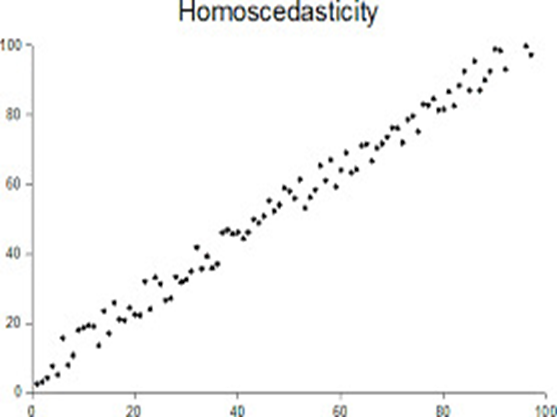

- Heterocedasticidad &#x2718;

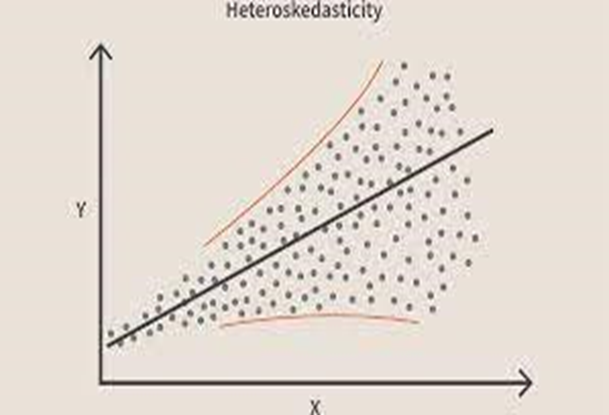

## Predicciones de nuestro modelo

¡Tomemos predicciones de nuestro conjunto de prueba y veamos qué tan bien lo hizo!

In [17]:
predictions = lm.predict(X_test)

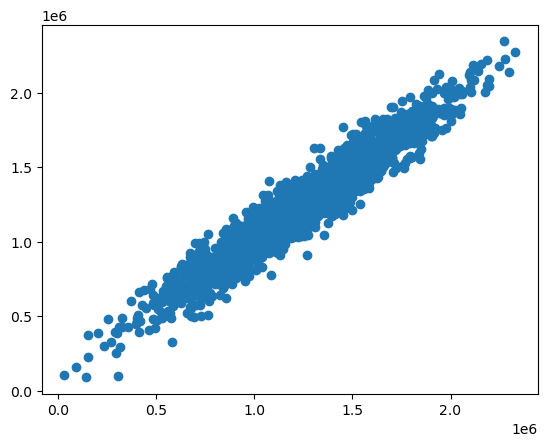

In [28]:
plt.scatter(y_test,predictions)

**Distribución de Residuos**

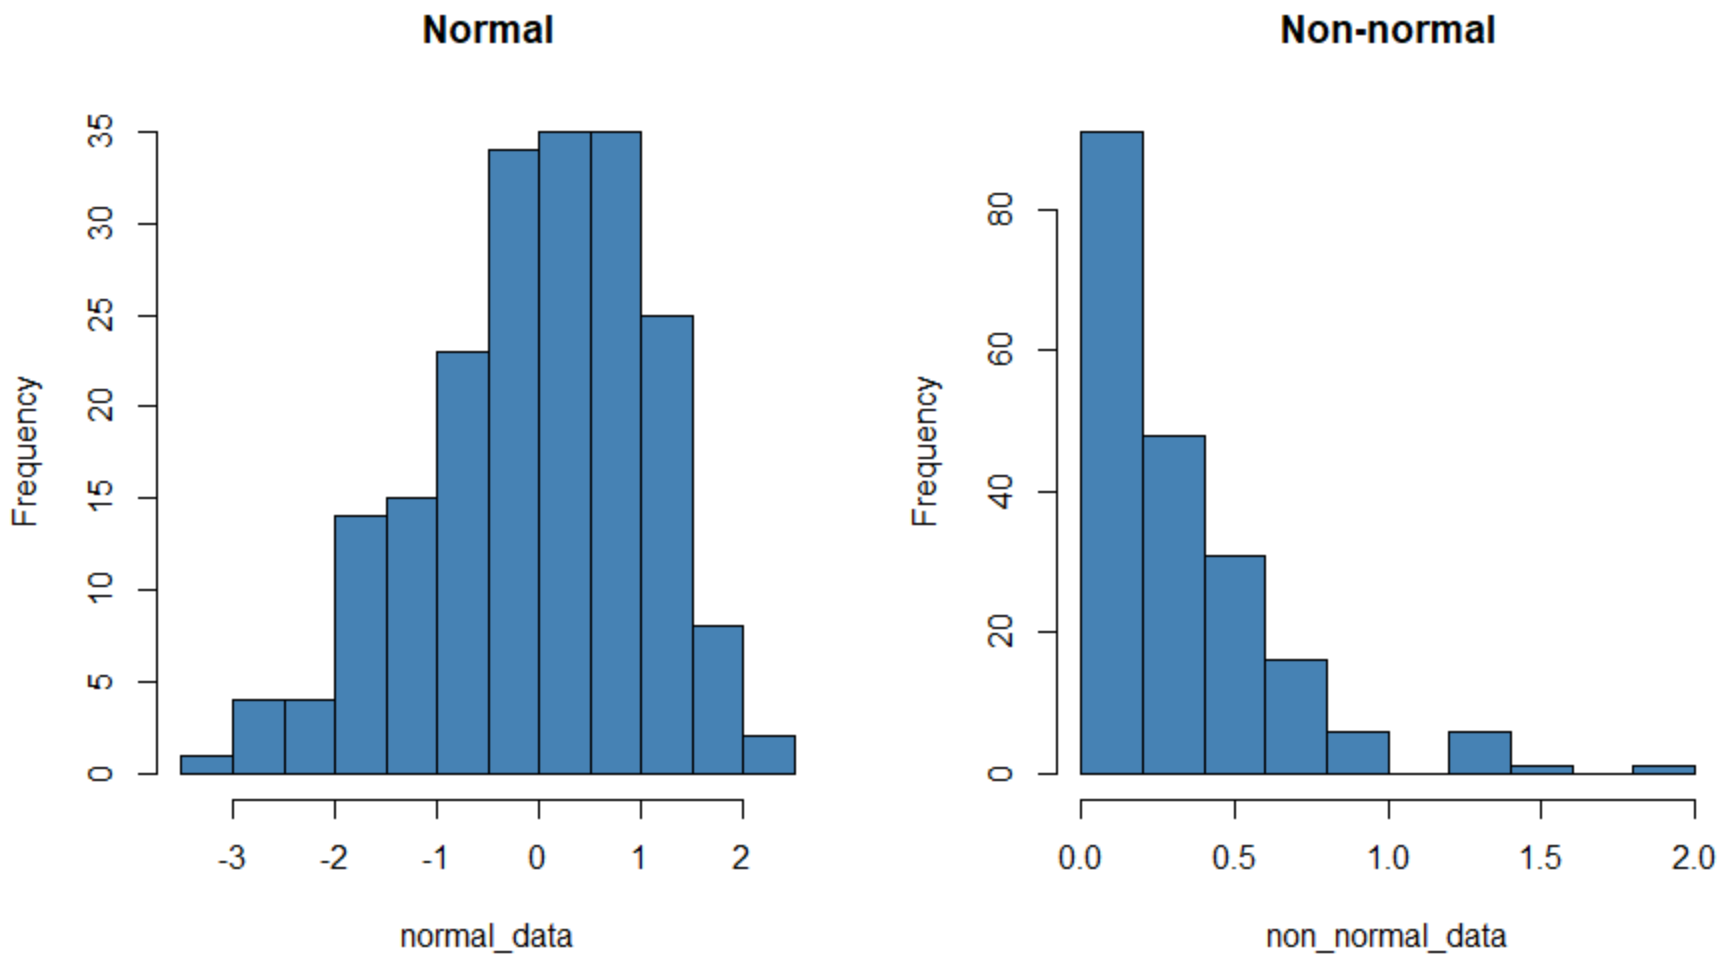

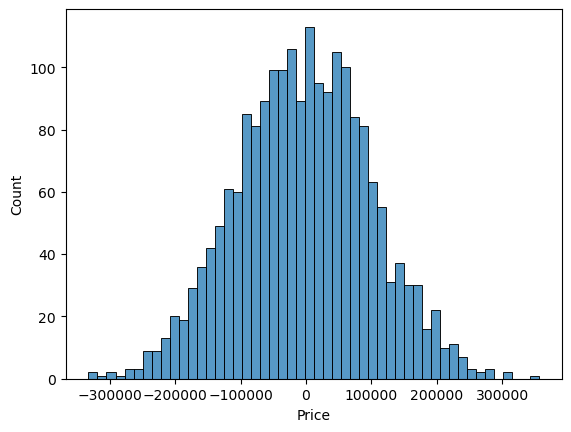

In [19]:
sns.histplot((y_test-predictions),bins=50);

## Métricas de evaluación de regresión


Aquí hay tres métricas de evaluación comunes para problemas de regresión:

**Error Absoluto Promedio** (MAE) es la media del valor absoluto de los errores:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Error Medio Cuadrático** (MSE) es la media de los errores al cuadrado:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Error cuadrático medio** (RMSE) es la raíz cuadrada de la media de los errores al cuadrado:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparando estas métricas:

- **MAE** es el más fácil de entender, porque es el error promedio.
- **MSE** es más popular que MAE, porque MSE "castiga" los errores más grandes, lo que tiende a ser útil en el mundo real.
- **RMSE** es incluso más popular que MSE, porque RMSE se puede interpretar en las unidades "y".

Todas estas son **funciones de pérdida**, porque queremos minimizarlas.

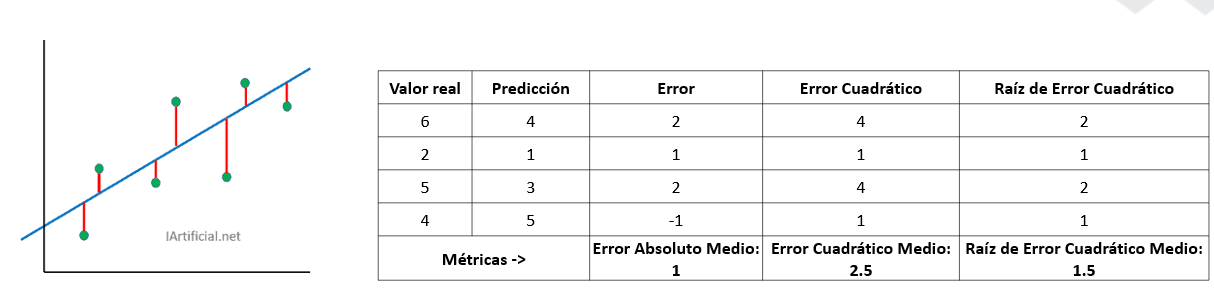

In [20]:
from sklearn import metrics

In [21]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914957
MSE: 10460958907.209684
RMSE: 102278.82922291242


In [22]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [23]:
X.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039
std,10657.991214,0.991456,1.005833,1.234137,9925.650114
min,17796.631190,2.644304,3.236194,2.000000,172.610686
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769
max,107701.748378,9.519088,10.759588,6.500000,69621.713378


In [24]:
#mis_datos = [[ingreso promedio,edad de la casa,salas,habitaciones,poblacion]]
mis_datos = [[100000,3,2,3,20000]]

print("Precio aproximado: {:,.2f}".format(lm.predict(mis_datos)[0]))

Precio aproximado: 561,764.76


C:\Users\gilbe\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


¡Este fue su primer proyecto de aprendizaje automático real! ¡Felicidades por ayudar a tu vecino! Dejaremos que esto termine aquí por ahora, pero continúe y explore el conjunto de datos de Boston mencionado anteriormente si este conjunto de datos en particular le resultó interesante.

¡Lo siguiente es su propio proyecto de aprendizaje automático!

## ¡Gran trabajo!